In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco
import cv2

/Users/yiming/Desktop/find/EE5731/Assignment2/venv/lib/python3.11/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


In [2]:
def compute_pixel_distance(patch1, patch2):
    """Compute the average pixel-wise absolute difference between two patches."""
    pixel_count = patch1.size
    flat_patch1 = patch1.flatten()
    flat_patch2 = patch2.flatten()
    distance = 0.0
    for i in range(pixel_count):
        distance += abs(float(flat_patch1[i]) - float(flat_patch2[i]))
    return distance / pixel_count

In [3]:
def compute_unary_potentials(left_image, right_image, num_disparity_levels):
    """Compute unary potentials for stereo matching."""
    image_height, image_width, _ = left_image.shape
    unary_potentials = np.zeros([image_height, image_width, num_disparity_levels])

    for y in range(0, image_height):
        for x in range(0, image_width):
            for i in range(0, num_disparity_levels):
                color_left = left_image[y][x]
                if (x - i) >= 0:
                    color_right = right_image[y][x - i]
                elif (x - i) < 0:
                    color_right = right_image[y][0]
                unary_potentials[y][x][i] = compute_pixel_distance(color_left, color_right) / 255

    return unary_potentials

In [19]:
def show_depth(left_image, right_image, l):
    unary_potentials = compute_unary_potentials(left_image, right_image, 50)
    pairwise_potentials = (1 - np.eye(50))
    disparity_map = pygco.cut_grid_graph_simple(unary_potentials, pairwise_potentials * l, n_iter=-1)
    disparity_map = disparity_map.reshape(left_image.shape[0], left_image.shape[1])
    plt.imshow(disparity_map, cmap='gray')
    a = 'Regularization lambda ='
    plt.title(f'{a} {l}')
    plt.show()

In [20]:
left_image = cv2.imread('left.png')
right_image = cv2.imread('right.png')

left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

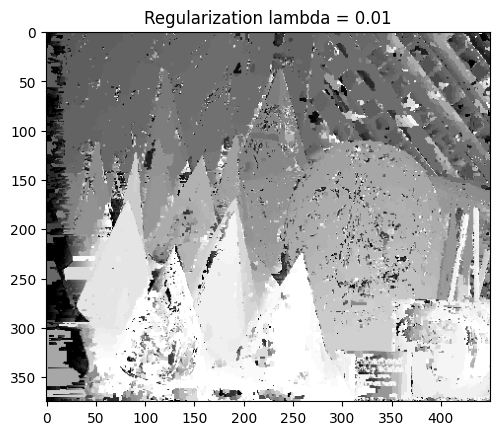

In [21]:
show_depth(left_image,right_image,0.01)

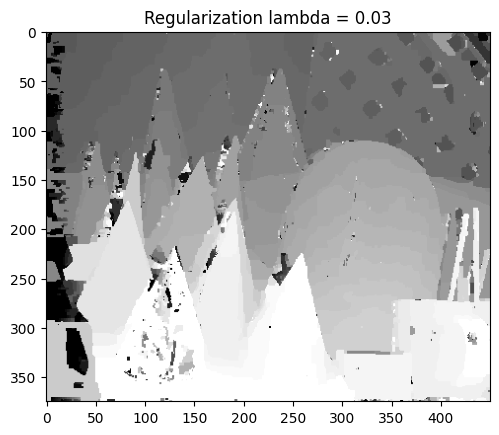

In [22]:
show_depth(left_image,right_image,0.03)

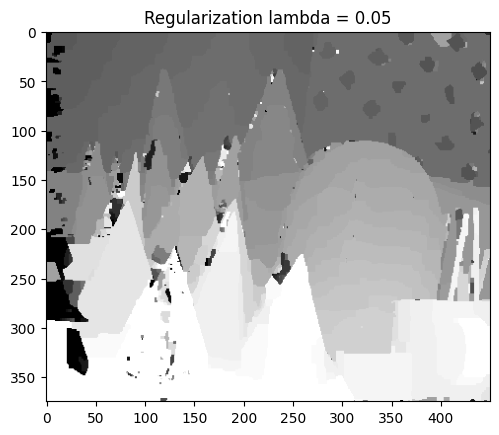

In [23]:
show_depth(left_image,right_image,0.05)

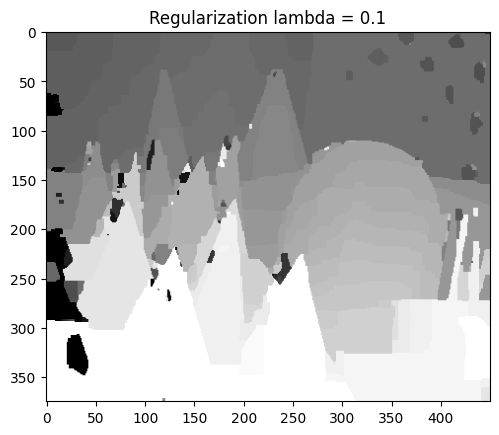

In [24]:
show_depth(left_image,right_image,0.1)

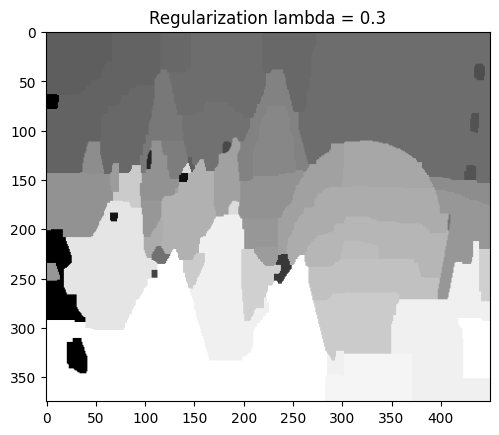

In [25]:
show_depth(left_image,right_image,0.3)

Best one is lambda equals to 0.1